# Day 41

## SVM - Support Vector Machine (This modle is popularly used for classification problem in the Machine Learning.)

The motive of the SVM to find out the line that divides both of the all the data pointes of n numbers of classes (Categorical columns).\
It will also try to find the Optimal Line (i.e the most equal divided the data) means the distance from the nearest poins will be equal and those points is known as margine.\
Hyperplane - The line that seperates the two classes (Features).
- Support Vector Machine (SVM) is a type of supervised machine learning algorithm that can be used for classification or regression tasks.
- It is based on the idea of finding a hyperplane that best separates the data into classes or predicts the target variable.
- The term "Margin" in SVM refers to the distance between the hyperplane and the closest data points, known as support vectors. The goal of SVM is to find the hyperplane with the maximum margin, which means that it has the greatest distance from the closest data points of each class. 
- The idea behind SVM is that the larger the margin, the more likely it is that the hyperplane will correctly classify new data.
  
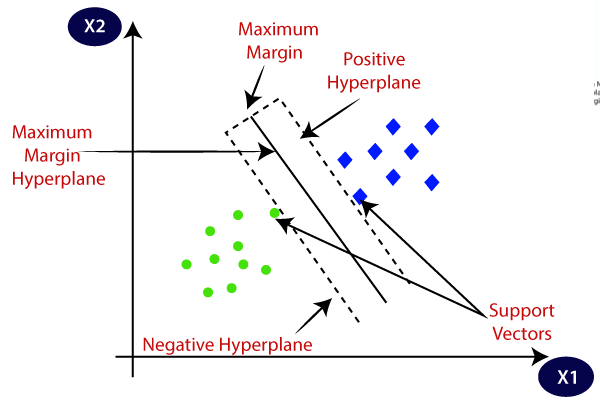


### Kernal 
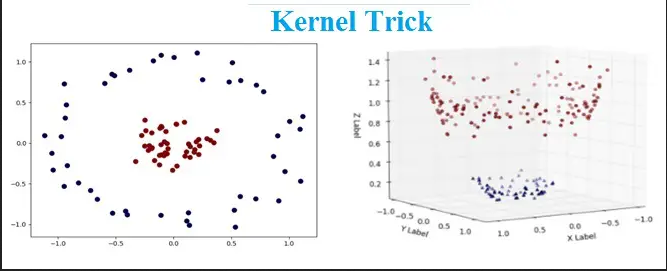
- It is a function that converts the lower dimensional data points into higher dimensional data points.
-  In simple terms, kernels in SVM help separate different groups of items, even when they're mixed together in a complex way.
-  There are several types of kernels that can be used in Support Vector Machines (SVM) for classification or regression tasks. Some of the most common kernels include:
   - Linear kernel: This is the simplest kernel and is used when the data is linearly separable. The linear kernel performs a dot product of the input features.

   - Polynomial kernel: This kernel is used when the data is not linearly separable. The polynomial kernel transforms the input features into a higher dimensional space, allowing for more complex decision boundaries.

   - Radial basis function (RBF) kernel: This is one of the most commonly used kernels in SVM. The RBF kernel maps the input features into a higher dimensional space and generates a decision boundary that is non-linear.

   - Sigmoid kernel: The sigmoid kernel is similar to the RBF kernel and maps the input features into a higher dimensional space. The sigmoid kernel is useful for binary classification problems.

   - Custom kernels: In addition to the commonly used kernels, SVM also allows the use of custom kernels, which are user-defined functions that can be used to transform the input data into a higher dimensional space.

## SVM - Support Vector Machine

*There are two types of SVM:*

1. SVR Support Vector Regression
   1. This type of SVM is used for regression problems, where the goal is to predict a continuous value output. 
   2. For example, predicting the price of a house based on its features.
   
      - **Steps to perform the SVR are as follows:**
        1. Collect the trainig sets
        2. Choose the Kernal (Perform the HPT)
        3. Model
        4. Train the Model
        5. Performance
   

2. SVC Support Vector Classification
   1. This type of SVM is used for binary classification problems, where the goal is to separate the data into two classes. 
   2. For example, classifying images as either "dog" or "not dog."

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Importing the Datasets

In [71]:
df = pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv")

In [72]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


### Problem Statement
In this data, we have two independent varaiabl (Features) "Hours of Study" and one dependent variable (Target) "Marks".\
You have to train a SVR model to understand the relationship between the Hours of Study and Marks of the Student to predict the student's marks based on their number of hours dedicated to studies.

### EDA

In [73]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [74]:
df.rename(columns={'Hours of Study' : 'Hours'}, inplace= True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   100 non-null    float64
 1   Marks   100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [76]:
df.isnull().sum()

Hours    0
Marks    0
dtype: int64

In [77]:
df.nunique()

Hours    100
Marks    100
dtype: int64

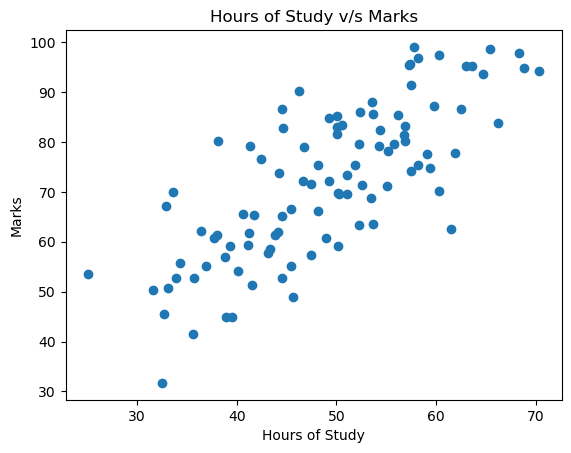

In [78]:
plt.scatter(df.Hours , df.Marks);
plt.xlabel("Hours of Study")
plt.ylabel("Marks")
plt.title("Hours of Study v/s Marks");

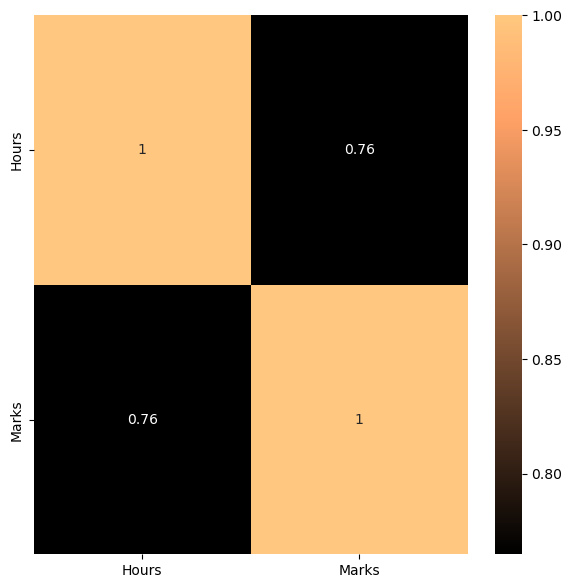

In [79]:
plt.figure(figsize=(7,7))
sns.heatmap (df.corr(), annot= True, cmap= 'copper');

### Feature Scalling
1. Standardilization
2. Normalisation
   
* It will going to scale out the range of data from -1 to 1.

In [80]:
df.head()

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [2]:
# For Standardilization
from sklearn.preprocessing import StandardScaler

In [82]:
# This is the First method to do the seperation of Target columns
# X = np.array(df.drop(columns = 'Marks', axis = 1))
# Y = np.array(df.Marks)

# This is the 2nd method to do the seperation of Target Columns which Must use in ML
X = df.iloc[:,0].values # or df.iloc[:,:-1] 
y = df.iloc[:,-1].values

In [83]:
stand_scale = StandardScaler()

In [84]:
X = stand_scale.fit_transform(X.reshape(-1,1))
y = stand_scale.fit_transform(y.reshape(-1,1))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [86]:
X_train.shape

(80, 1)

In [87]:
X_test.shape

(20, 1)

In [3]:
from sklearn.svm import SVR

In [89]:
model = SVR(kernel="rbf")

In [90]:
model.fit(X_train,y_train)

C:\Users\Shree\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [91]:
y_pred = model.predict(X_test)

In [92]:
# y_pred

In [93]:
y_pred = stand_scale.inverse_transform(y_pred.reshape(-1,1))

In [94]:
y_pred

array([[60.39764577],
       [81.48677868],
       [66.49889641],
       [52.93601862],
       [80.71338315],
       [70.24215505],
       [60.59170512],
       [65.92240434],
       [56.96814488],
       [86.44247075],
       [88.27618157],
       [77.33308614],
       [63.51595177],
       [64.15643611],
       [73.17585776],
       [90.56964555],
       [92.26453877],
       [82.25831189],
       [63.41941707],
       [62.23679956]])

In [95]:
y_test = stand_scale.inverse_transform(y_test)

In [96]:
y_test

array([[56.87721319],
       [81.43619216],
       [61.4247098 ],
       [50.71958891],
       [85.49806778],
       [71.54663223],
       [44.84712424],
       [58.56982472],
       [62.12457082],
       [70.25193442],
       [62.5623823 ],
       [68.77759598],
       [61.68403752],
       [65.28088692],
       [81.53699078],
       [94.25710159],
       [94.85387123],
       [95.45505292],
       [59.35885025],
       [54.0840548 ]])

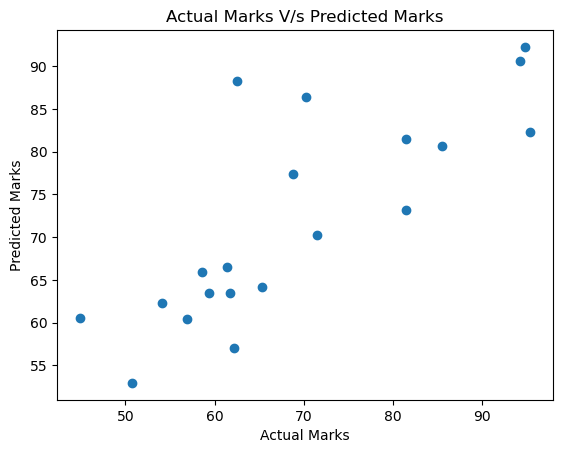

In [99]:
plt.scatter(y_test, y_pred);
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title('Actual Marks V/s Predicted Marks');

In [110]:
stand_scale.inverse_transform(model.predict([[5]]).reshape(-1,1))

array([[71.50453478]])

In [111]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [112]:
model.score(X_test, y_test)

-22.099949752331796

In [113]:
r2_score(y_test, y_pred)

0.5943071038285547

In [114]:
mean_squared_error(y_test, y_pred)

87.23306900235274

In [115]:
mean_absolute_error(y_test, y_pred)

6.933427431006029